In [2]:
import urllib.request
import gzip
import os
from string import ascii_lowercase as lowercase
import matplotlib.pyplot as plt
import networkx as nx

Download the file if it doesn't exist

In [3]:
if not os.path.exists("words_dat.txt.gz"):
    print("Downloading words_dat.txt.gz...")
    url = "https://github.com/networkx/networkx/blob/main/examples/graph/words_dat.txt.gz?raw=true"
    urllib.request.urlretrieve(url, "words_dat.txt.gz")
    print("Download complete.")

Generating the Word Graph

In [4]:
def generate_graph(words):
    G = nx.Graph(name="words")
    lookup = {c: lowercase.index(c) for c in lowercase}

    def edit_distance_one(word):
        for i in range(len(word)):
            left, c, right = word[0:i], word[i], word[i + 1 :]
            j = lookup[c]  # lowercase.index(c)
            for cc in lowercase[j + 1 :]:
                yield left + cc + right

    candgen = (
        (word, cand)
        for word in sorted(words)
        for cand in edit_distance_one(word)
        if cand in words
    )
    G.add_nodes_from(words)
    for word, cand in candgen:
        G.add_edge(word, cand)
    return G

In [5]:
def words_graph():
    fh = gzip.open("words_dat.txt.gz", "r")
    words = set()
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):
            continue
        w = str(line[0:5])
        words.add(w)
    return generate_graph(words)

In [6]:
G = words_graph()
print(G)
print(f"{nx.number_connected_components(G)} connected components")

Graph named 'words' with 5757 nodes and 14135 edges
853 connected components


In [7]:
# Calculate the degree of each node in the graph
node_degrees = dict(G.degree())

# Display the degrees of the nodes
for node, degree in node_degrees.items():
    print(f"Node {node} has degree {degree}")

Node segue has degree 0
Node miens has degree 1
Node slung has degree 7
Node shots has degree 10
Node trawl has degree 4
Node hazes has degree 15
Node tithe has degree 3
Node apers has degree 1
Node fiver has degree 12
Node belly has degree 10
Node forum has degree 0
Node glued has degree 6
Node jinks has degree 13
Node terms has degree 6
Node amens has degree 2
Node besot has degree 2
Node polka has degree 0
Node annex has degree 0
Node kikes has degree 9
Node punny has degree 8
Node knoll has degree 1
Node costs has degree 9
Node hitch has degree 7
Node bahts has degree 1
Node brent has degree 2
Node yeast has degree 3
Node etext has degree 0
Node kills has degree 15
Node chime has degree 7
Node lamer has degree 13
Node dungy has degree 3
Node pokey has degree 5
Node croup has degree 1
Node cello has degree 3
Node demos has degree 2
Node noway has degree 0
Node shims has degree 9
Node yogis has degree 2
Node barns has degree 13
Node verse has degree 7
Node avoid has degree 1
Node off

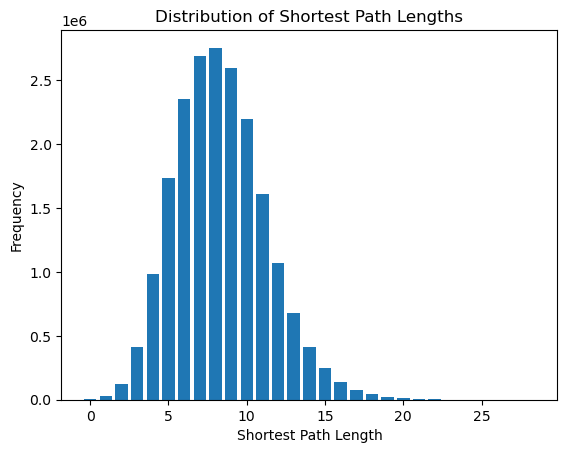

In [8]:
# Calculate the shortest path lengths between all pairs of nodes
all_shortest_paths = dict(nx.shortest_path_length(G))

# Calculate the distribution of path lengths
path_lengths = [length for paths in all_shortest_paths.values() for length in paths.values()]

# Display the distribution of path lengths
plt.hist(path_lengths, bins=range(min(path_lengths), max(path_lengths) + 1), align='left', rwidth=0.8)
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Shortest Path Lengths')
plt.show()

In [9]:
# Calculate the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(G)

# Display the betweenness centrality of each node
for node, centrality in betweenness_centrality.items():
    print(f"Node {node} has betweenness centrality {centrality}")

Node segue has betweenness centrality 0.0
Node miens has betweenness centrality 0.0
Node slung has betweenness centrality 0.00016532292900724884
Node shots has betweenness centrality 0.009680395188930027
Node trawl has betweenness centrality 0.0009032883003720806
Node hazes has betweenness centrality 0.0007810036770021338
Node tithe has betweenness centrality 0.0004046090338482547
Node apers has betweenness centrality 0.0
Node fiver has betweenness centrality 0.0006925768127435995
Node belly has betweenness centrality 0.00537105176263977
Node forum has betweenness centrality 0.0
Node glued has betweenness centrality 0.00010909498737193631
Node jinks has betweenness centrality 0.0003137177309608895
Node terms has betweenness centrality 0.0014407715331117156
Node amens has betweenness centrality 1.9924059146682732e-06
Node besot has betweenness centrality 0.000657780569951172
Node polka has betweenness centrality 0.0
Node annex has betweenness centrality 0.0
Node kikes has betweenness ce

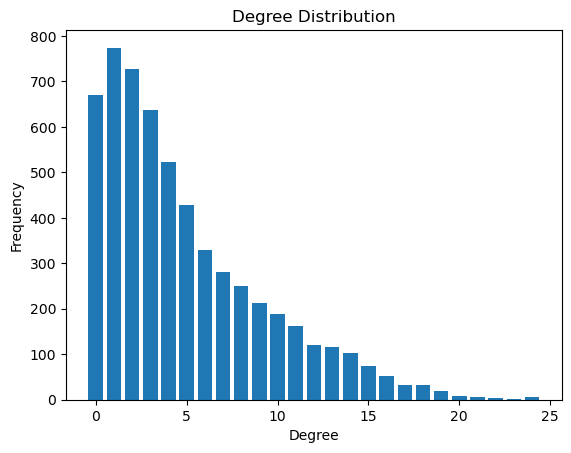

In [10]:
# Calculate the degrees of nodes in the graph
degrees = [deg for node, deg in G.degree()]

# Plot the degree distribution
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), align='left', rwidth=0.8)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

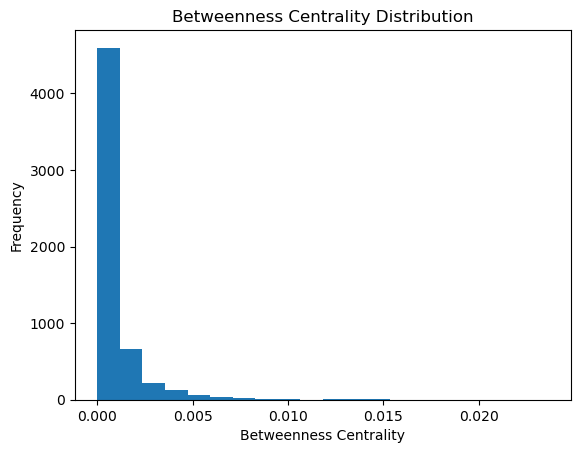

In [11]:
# Calculate the betweenness centrality of each node
betweenness_centrality = nx.betweenness_centrality(G)

# Plot a histogram of betweenness centrality
plt.hist(list(betweenness_centrality.values()), bins=20)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Distribution')
plt.show()

Shortest path between chaos and order is
chaos
choos
shoos
shoes
shoed
shred
sired
sided
aided
added
adder
odder
order


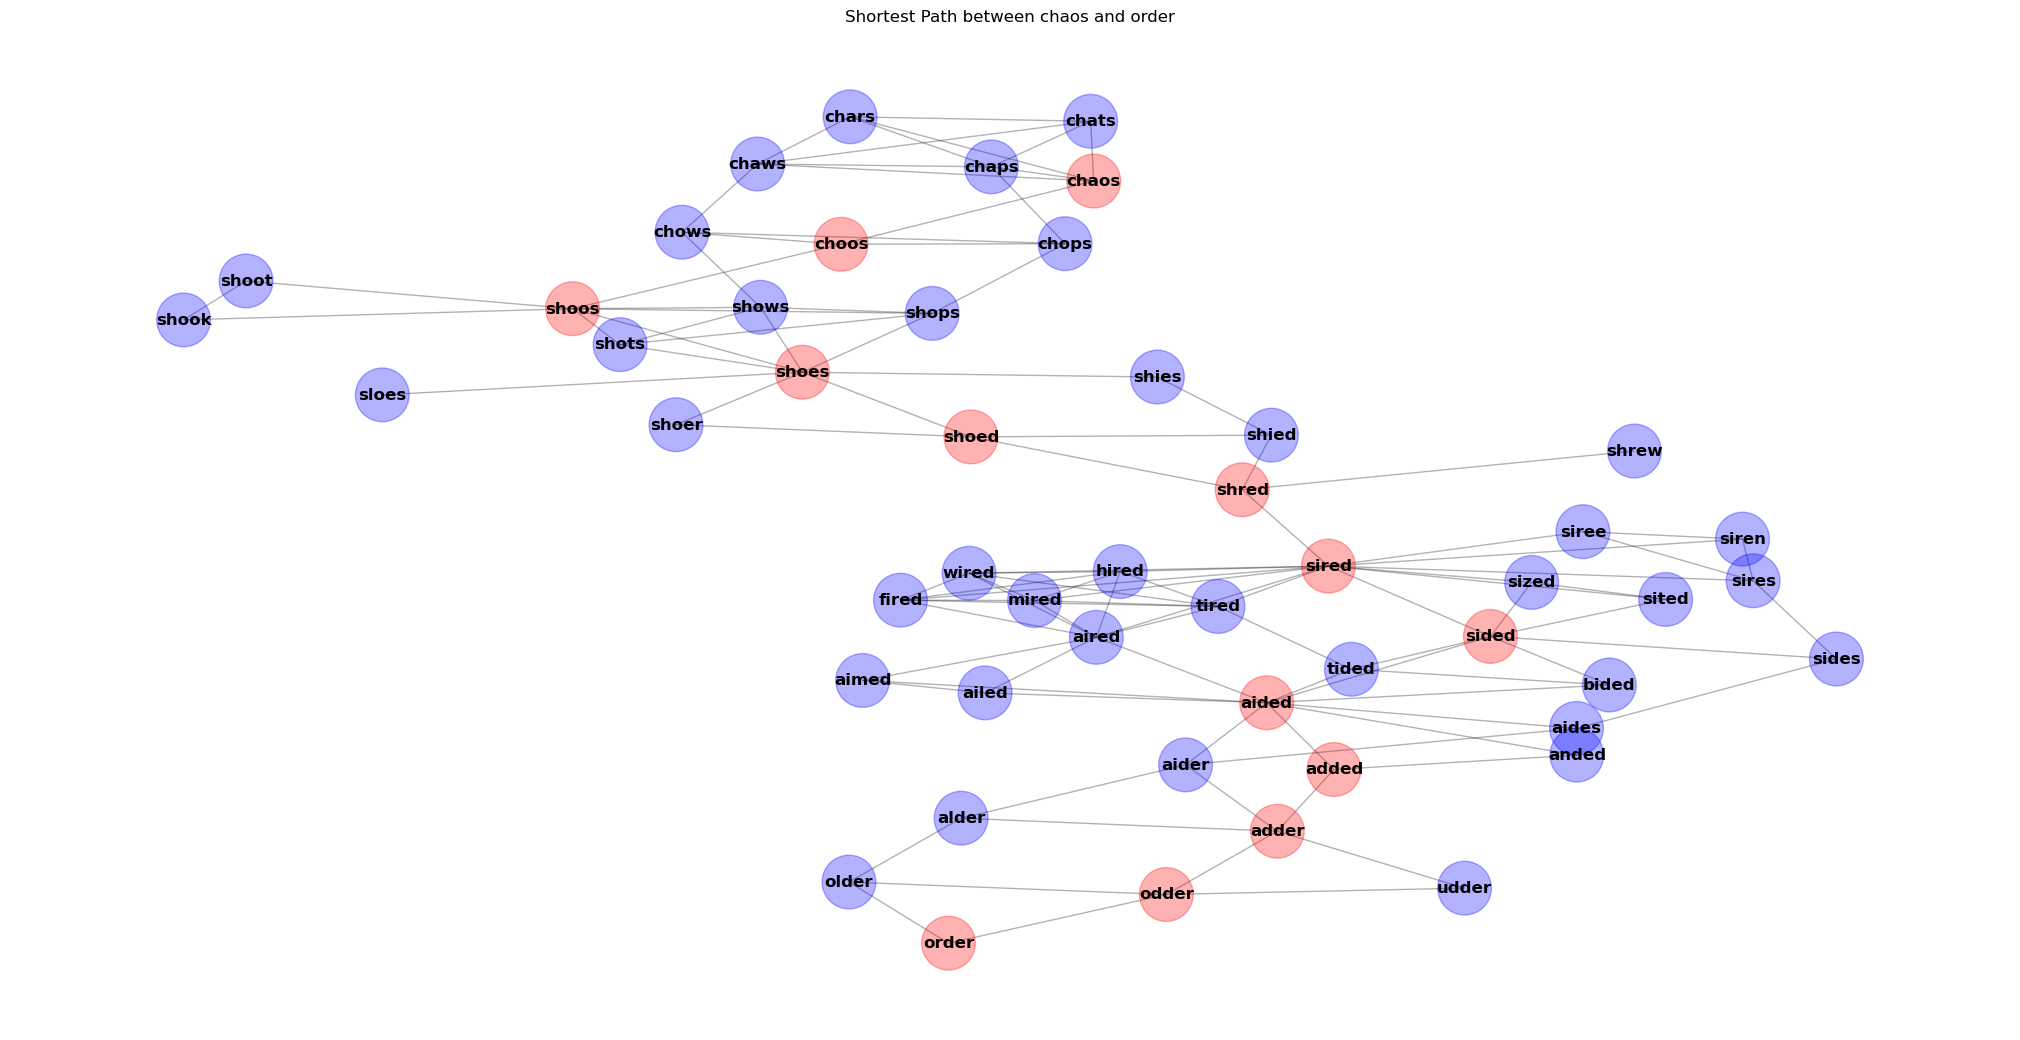

Shortest path between nodes and graph is
nodes
lodes
lores
lords
loads
goads
grads
grade
grape
graph


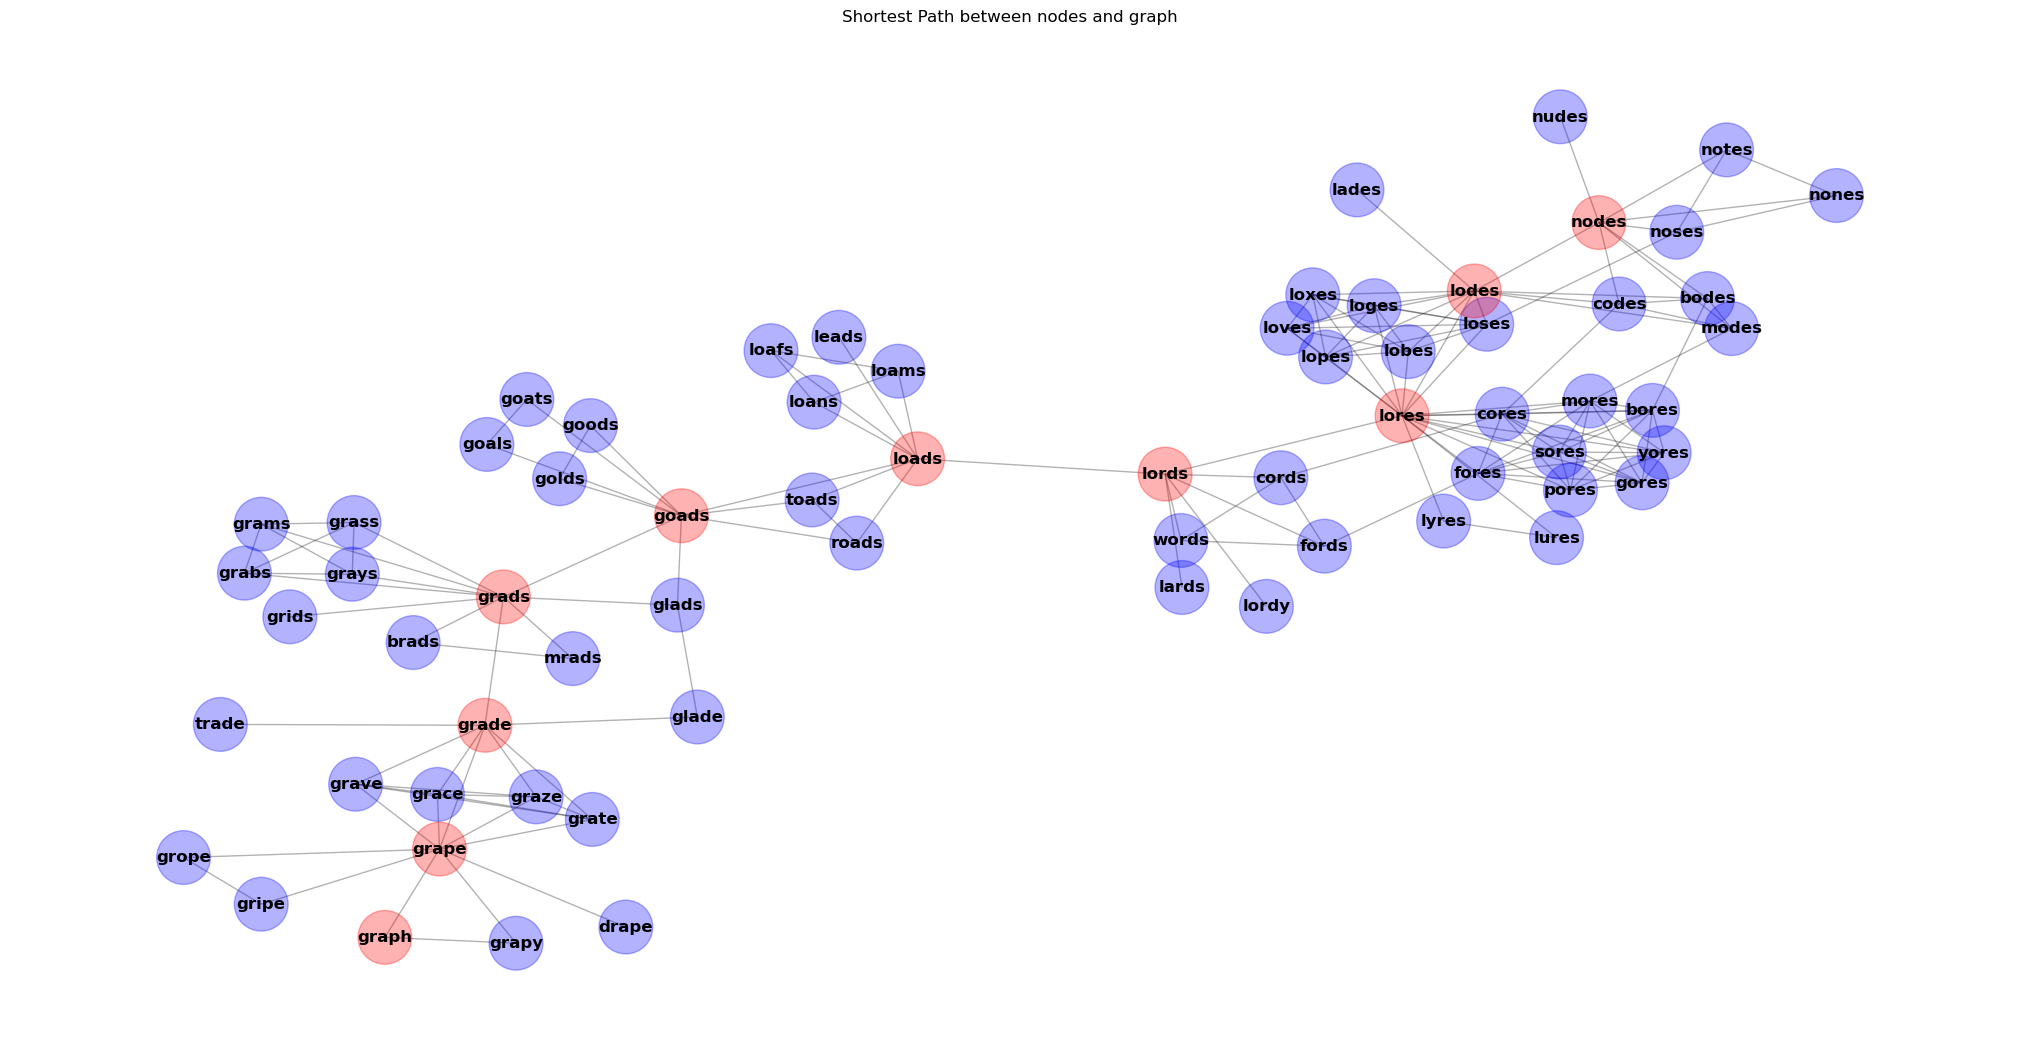

Shortest path between pound and marks is
None



In [12]:
# Show shortest paths between word pairs
for source, target in [("chaos", "order"), ("nodes", "graph"), ("pound", "marks")]:
    print(f"Shortest path between {source} and {target} is")
    try:
        shortest_path = nx.shortest_path(G, source, target)
        for n in shortest_path:
            print(n)
        
        # Draw a subset of the graph for each word pair
        plt.figure(figsize=(20, 10))
        boundary = list(nx.node_boundary(G, shortest_path))
        G.add_nodes_from(shortest_path, color="red")
        G.add_nodes_from(boundary, color="blue")
        H = G.subgraph(shortest_path + boundary)
        colors = nx.get_node_attributes(H, "color")
        options = {"node_size": 1500, "alpha": 0.3, "node_color": colors.values()}
        pos = nx.kamada_kawai_layout(H)
        nx.draw(H, pos, **options)
        nx.draw_networkx_labels(H, pos, font_weight="bold")
        plt.title(f"Shortest Path between {source} and {target}")
        plt.show()
        
    except nx.NetworkXNoPath:
        print("None")
        print()  # Add a blank line between each word pair

Graph density: 0.0008531173881076342


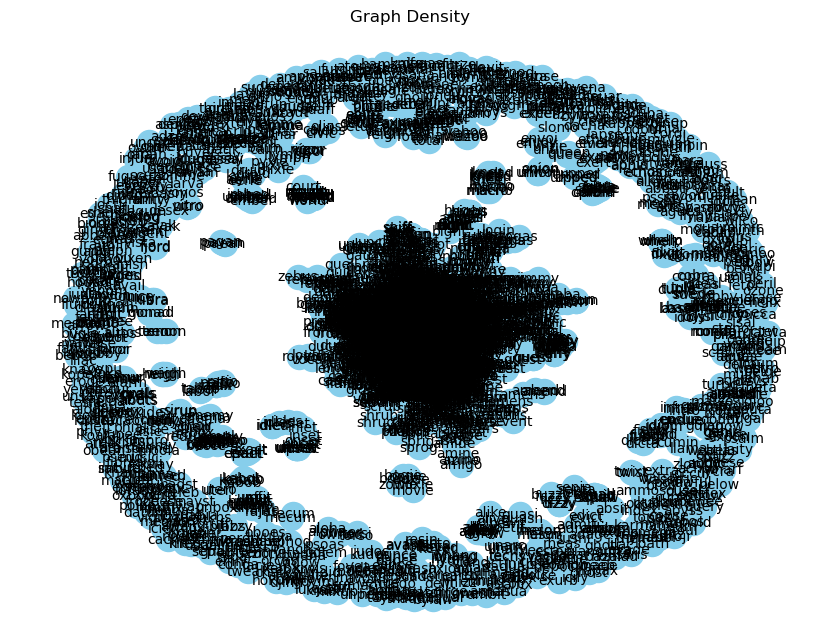

In [13]:
# Calculate the density of the graph
density = nx.density(G)
print("Graph density:", density)

# Plot a graph diagram
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=300, font_size=10, node_color='skyblue', edge_color='gray', width=0.5)
plt.title("Graph Density")
plt.show()

In [14]:
# Prepare data for training the missing word prediction model
import numpy as np
# Create word sequences from the shortest paths between pairs of words
sequences = []
for source, target in [("chaos", "order"), ("nodes", "graph"), ("pound", "marks")]:
    try:
        shortest_path = nx.shortest_path(G, source, target)
        sequences.append(shortest_path)
    except nx.NetworkXNoPath:
        pass  # Ignore if no path exists

In [15]:
# Convert sequences into inputs and targets for training
X_train = []
y_train = []
for sequence in sequences:
    for i in range(1, len(sequence)):
        X_train.append(sequence[i-1])
        y_train.append(sequence[i])

# Convert the lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder to convert words into numerical indices
label_encoder = LabelEncoder()
label_encoder.fit(list(G.nodes))

# Convert the training data into numerical indices
X_train_encoded = label_encoder.transform(X_train)
y_train_encoded = label_encoder.transform(y_train)

# Reshape the input data to be three-dimensional
X_train_encoded = np.expand_dims(X_train_encoded, axis=-1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [18]:
# Create the RNN model for missing word prediction
model = Sequential([
    Embedding(input_dim=len(G.nodes), output_dim=100, input_length=1),
    LSTM(units=128),
    Dense(units=len(G.nodes), activation='softmax')
])

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_encoded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 8.6582 - val_accuracy: 0.0000e+00 - val_loss: 8.6579
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1875 - loss: 8.6552 - val_accuracy: 0.0000e+00 - val_loss: 8.6579
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6250 - loss: 8.6521 - val_accuracy: 0.0000e+00 - val_loss: 8.6579
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9375 - loss: 8.6490 - val_accuracy: 0.0000e+00 - val_loss: 8.6579
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 8.6459 - val_accuracy: 0.0000e+00 - val_loss: 8.6579
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 8.6427 - val_accuracy: 0.0000e+00 - val_loss: 8.6578
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 8.6395 - val_accuracy: 0.0000e+00 - val_loss: 8.6578
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 8.6361 - val_accura

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_encoded, y_train_encoded, test_size=0.2, random_state=42)